In [1]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
from tensorflow.keras import optimizers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gc
import pickle

In [2]:
gc.collect()

43

In [3]:
def append_ext(fn):
    return fn + ".jpg"

traindf = pd.read_csv('../input/planet-understanding-the-amazon-from-space/train_v2.csv/train_v2.csv', dtype=str)
testdf = pd.read_csv('../input/planet-understanding-the-amazon-from-space/sample_submission_v2.csv/sample_submission_v2.csv', dtype=str)

traindf["image_name"] = traindf["image_name"].apply(append_ext)
testdf["image_name"] = testdf["image_name"].apply(append_ext)

datagen = ImageDataGenerator(rescale = 1./255.,
                             validation_split = 0.25,
                             rotation_range = 10,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True,
                             brightness_range = [0.2,1.2])

In [4]:
train_generator = datagen.flow_from_dataframe(
    dataframe = traindf,
    directory = '../input/d/yusira/amazonsatelliteimages/train-jpg/train-jpg',
    x_col = 'image_name',
    y_col = 'tags',
    subset = 'training',
    batch_size = 340,
    seed = 42,
    shuffle = True,
    class_mode = 'categorical',
    target_size = (32, 32))

valid_generator = datagen.flow_from_dataframe(
    dataframe = traindf,
    directory = '../input/d/yusira/amazonsatelliteimages/train-jpg/train-jpg',
    x_col = 'image_name',
    y_col = 'tags',
    subset = 'validation',
    batch_size = 340,
    seed = 42,
    shuffle = True,
    class_mode = 'categorical',
    target_size = (32, 32))



Found 30360 validated image filenames belonging to 449 classes.
Found 10119 validated image filenames belonging to 449 classes.


In [5]:
test_generator = datagen.flow_from_dataframe(
    dataframe = testdf,
    directory = '../input/d/yusira/amazonsatelliteimages/test-jpg/test-jpg',
    x_col = 'image_name',
    y_col = None,
    batch_size = 340,
    seed = 42,
    shuffle = False,
    class_mode = None,
    target_size = (32, 32))

test_generator2 = datagen.flow_from_dataframe(
    dataframe = testdf,
    directory = '../input/d/yusira/amazonsatelliteimages/test-jpg-additional/test-jpg-additional',
    x_col = 'image_name',
    y_col = None,
    batch_size = 340,
    seed = 42,
    shuffle = False,
    class_mode = None,
    target_size = (32, 32))

/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 20522 invalid image filename(s) in x_col="image_name". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 40669 validated image filenames.
Found 20522 validated image filenames.


/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 40669 invalid image filename(s) in x_col="image_name". These filename(s) will be ignored.
  .format(n_invalid, x_col)


#### building the model

In [6]:
# using the VGG16 Architecture
model = Sequential()

# model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.5))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.5))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.5))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(4096))
model.add(Dense(4096))
model.add(Activation('relu'))
# model.add(Dropout(0.5))

model.add(Dense(449, activation='softmax'))
opt = optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

2021-10-25 09:58:44.632284: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-25 09:58:44.718286: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-25 09:58:44.719025: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-25 09:58:44.721125: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
activation (Activation)      (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 128)       0

In [8]:
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST = test_generator.n//test_generator.batch_size

train = model.fit(train_generator,
          steps_per_epoch = STEP_SIZE_TRAIN,
          validation_data = valid_generator,
          validation_steps = STEP_SIZE_VALID,
          epochs=5)

2021-10-25 09:58:49.335934: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5


2021-10-25 09:58:53.661896: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


89/89 [==============================] - 247s 3s/step - loss: 3.7385 - accuracy: 0.2813 - val_loss: 3.0985 - val_accuracy: 0.3378
Epoch 2/5
89/89 [==============================] - 152s 2s/step - loss: 3.0669 - accuracy: 0.3499 - val_loss: 2.8931 - val_accuracy: 0.3819
Epoch 3/5
89/89 [==============================] - 141s 2s/step - loss: 2.8415 - accuracy: 0.3914 - val_loss: 2.7759 - val_accuracy: 0.4026
Epoch 4/5
89/89 [==============================] - 125s 1s/step - loss: 2.6998 - accuracy: 0.4192 - val_loss: 2.5711 - val_accuracy: 0.4338
Epoch 5/5
89/89 [==============================] - 119s 1s/step - loss: 2.5792 - accuracy: 0.4336 - val_loss: 2.5563 - val_accuracy: 0.4460


Text(0, 0.5, 'Accuracy')

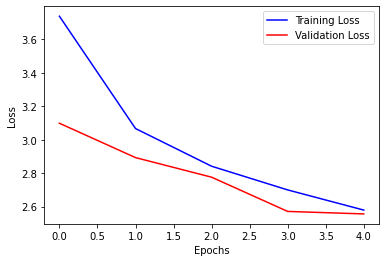

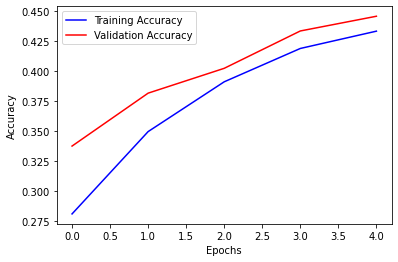

In [9]:
plt.figure()
plt.plot(train.history['loss'], 'blue')
plt.plot(train.history['val_loss'], 'red')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.figure()
plt.plot(train.history['accuracy'], 'blue')
plt.plot(train.history['val_accuracy'], 'red')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [10]:
model.evaluate(valid_generator, steps=STEP_SIZE_TEST)

119/119 [==============================] - 30s 246ms/step - loss: 2.5592 - accuracy: 0.4452


[2.5591933727264404, 0.4452020823955536]

#### making predictions

In [11]:
test_generator.reset()
pred = model.predict(test_generator, steps=STEP_SIZE_TEST, verbose=1)

119/119 [==============================] - 242s 2s/step


In [12]:
test_generator2.reset()
pred2 = model.predict(test_generator2, steps=STEP_SIZE_TEST, verbose=1)

119/119 [==============================] - 118s 990ms/step


##### mapping the predicted class indices/labels with the filenames

In [13]:
predicted_class_indices = np.argmax(pred, axis=1)
predicted_class_indices2 = np.argmax(pred2, axis=1)

labels = (train_generator.class_indices)
labels = dict((v, k) for k, v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

filenames = test_generator.filenames
predict = pd.DataFrame(predictions, columns=['tags'])
filename = pd.DataFrame(filenames, columns=['image_name'])[:40460]

In [14]:
labels2 = (train_generator.class_indices)
labels2 = dict((v, k) for k, v in labels2.items())
predictions2 = [labels2[k] for k in predicted_class_indices2]

filenames = test_generator2.filenames
predict2 = pd.DataFrame(predictions2, columns=['tags'])
filename2 = pd.DataFrame(filenames, columns=['image_name'])

# saving predictions to csv file
results = pd.concat([filename, predict], axis=1)
results2 = pd.concat([filename2, predict2], axis=1)
final_result = pd.concat([results, results2])

In [15]:
final_result
final_result.to_csv("./final-results.csv", index=False)